In [2]:
all_answers = read_answers()

categories = extra.read_categories()
category_names = categories.category_names()

scorings = read_scorings(all_answers)

for scoring in scorings.values():
    scored_answers = [ans for ans in scoring.answers()]
    scored_with_ai = [ans for ans in scoring.with_ai().answers()]
    scored_without = [ans for ans in scoring.without_ai().answers()]
    break

[ ] Read 146 answers from data/alle-svar.csv
[ ] Read 58 categories from data/category.csv
[ ] Read 58 scorings from data/scoring/kristoffer.csv
[ ] Read 58 scorings from data/scoring/pernille.csv
[ ] Read 58 scorings from data/scoring/trine.csv
[ ] Read 58 scorings from data/scoring/zia.csv
[ ] Read 58 scorings from data/scoring/felles.csv


# AI vs. uten AI

Sammenligning av vurderingskriterier mellom AI og ikke-AI svar.

- Gjennomsnitt og median.
- Sensor-vurderinger og selvvurderinger.

## Median Scoring

In [3]:
median = Scoring.from_median(scorings.values())
analysis.scoring_report(median.with_ai(), median.without_ai())

With AI: 29
Without: 29

Originalitet
       With AI vs. Without
Mean   =  2.69     1.93
Median =  2.00     2.00

Gjennomførbarhet
       With AI vs. Without
Mean   =  3.86     3.83
Median =  4.00     4.00

Potensiell effekt
       With AI vs. Without
Mean   =  3.14     2.48
Median =  3.00     3.00

Total, 60/20/20
       With AI vs. Without
Mean   =  3.01     2.42
Median =  2.80     2.40


## Self-evaluation

In [4]:
self_evals = Scoring(
    ScoringEntry.from_answer(ans, ans.number)
    for ans in scored_answers
)
analysis.scoring_report(self_evals.with_ai(), self_evals.without_ai())

With AI: 29
Without: 29

Originalitet
       With AI vs. Without
Mean   =  2.45     2.14
Median =  2.00     2.00

Gjennomførbarhet
       With AI vs. Without
Mean   =  4.59     4.31
Median =  5.00     4.00

Potensiell effekt
       With AI vs. Without
Mean   =  3.66     3.79
Median =  4.00     4.00

Total, 60/20/20
       With AI vs. Without
Mean   =  3.12     2.90
Median =  3.20     2.80


# Other Dimensions

Analysis of the results based on other dimensions.

In [5]:
categories = extra.read_categories()
category_names = categories.category_names()

categorized_with_ai = categorize(scored_with_ai, categories)
categorized_without = categorize(scored_without, categories)

categorized_with_ai_grouped = {}
for ans in categorized_with_ai:
    categorized_with_ai_grouped.setdefault(ans.category, []).append(ans)

categorized_without_grouped = {}
for ans in categorized_without:
    categorized_without_grouped.setdefault(ans.category, []).append(ans)

[ ] Read 58 categories from data/category.csv


## Category Count

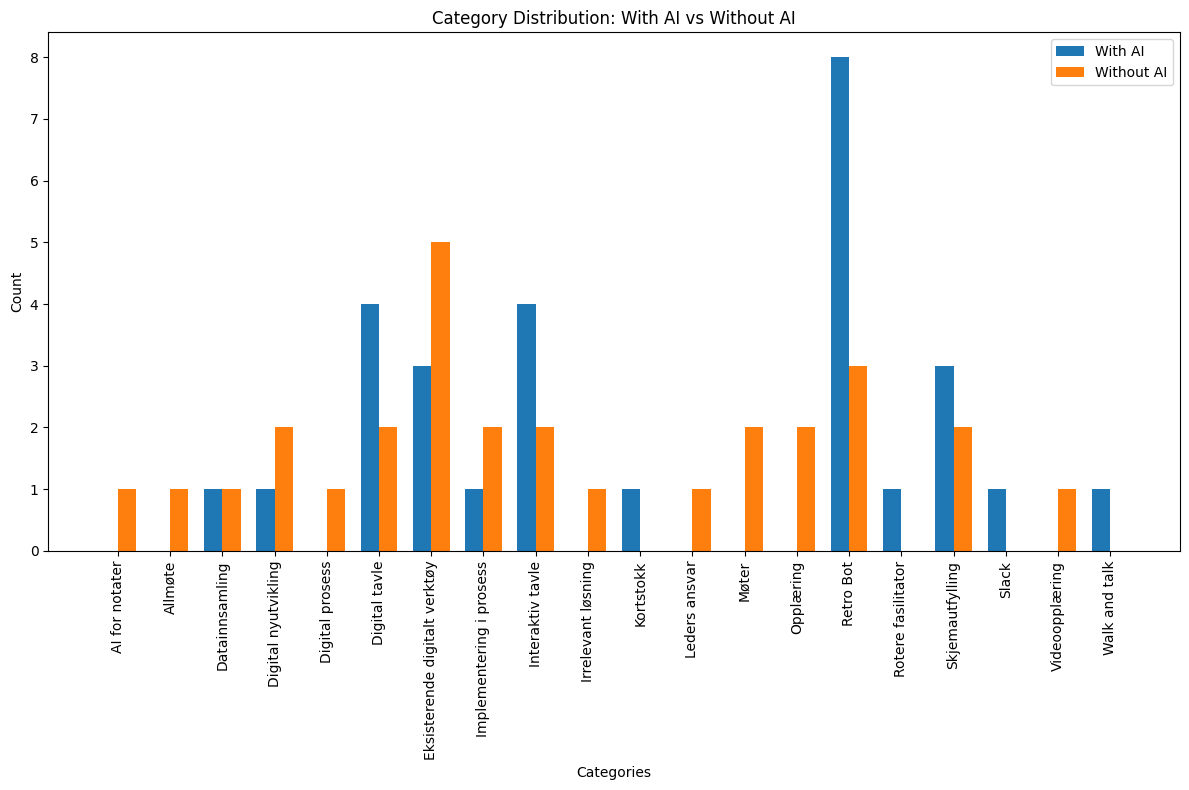

In [6]:
with_ai_count = {k: len(g) for k, g in categorized_with_ai_grouped.items()}
without_count = {k: len(g) for k, g in categorized_without_grouped.items()}

analysis.bar_plot_compare_ai(
    values_with_ai=[with_ai_count.get(cat, 0) for cat in category_names],
    values_without=[without_count.get(cat, 0) for cat in category_names],
    title='Category Distribution: With AI vs Without AI',
    ylabel='Count',
    xlabel='Categories',
    xticklabels=category_names,
)

# Category Scoring

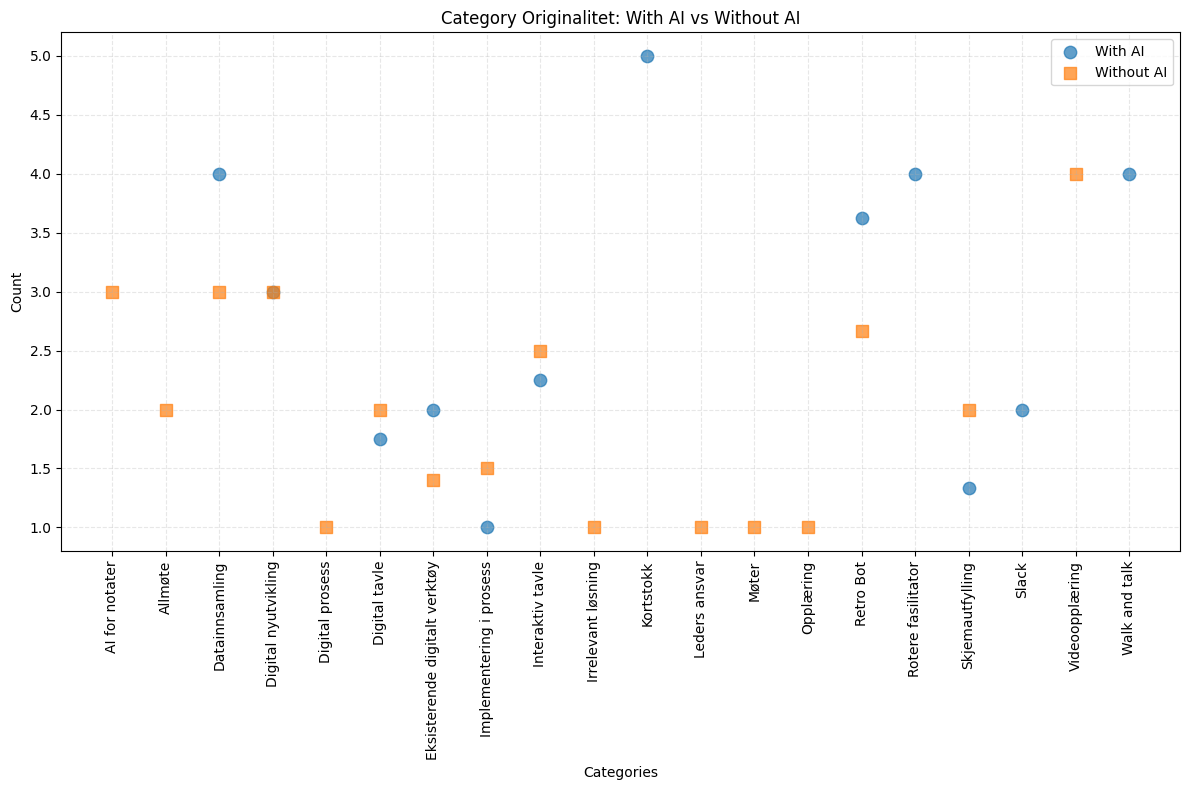

In [7]:
with_ai_original = {
    category: median.original_mean(answers)
    for category, answers in categorized_with_ai_grouped.items()
}

without_original = {
    category: median.original_mean(answers)
    for category, answers in categorized_without_grouped.items()
}

analysis.scatter_plot(
    line_values=[
        [with_ai_original.get(cat, None) for cat in category_names],
        [without_original.get(cat, None) for cat in category_names],
    ],
    line_labels=['With AI', 'Without AI'],
    title='Category Originalitet: With AI vs Without AI',
    ylabel='Count',
    xlabel='Categories',
    xticklabels=category_names,
)


## Number of Ideas

In [8]:
cnt_with_ai = 0
for ans in categorized_with_ai:
    cnt_with_ai = cnt_with_ai + ans.ideas

avg_with_ai = statistics.mean(ans.ideas for ans in categorized_with_ai)

cnt_without = 0
for ans in categorized_without:
    cnt_without = cnt_without + ans.ideas

avg_without = statistics.mean(ans.ideas for ans in categorized_without)

print(f'    With AI   Without')
print(f'Total    {cnt_with_ai:>2}   {cnt_without}')
print(f'Average  {avg_with_ai:>2}   {avg_without:.3}')

    With AI   Without
Total    87   67
Average   3   2.31
